In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [48]:
from state import Board, makemove, getmoves, isvalidboard, isvalidmove
from draw import drawboard
from match import make_start_board, match, judge

## The Rules

In this simplified version of Ludo, two players Red and Blue start on opposite ends of circular board of length *L*. The objective of the game is to complete a full circuit with each of your counters, starting and ending at your *home square*. 

1. In the beginning, both sides have all their counters in the *pen*. To move a counter out of the pen to your home square, you must roll a maximum (6). The home square for Red and Blue is at 0 and L/2, respectively.

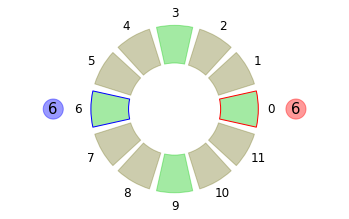

In [14]:
b = make_start_board(6, 12, safesquares=(3,9))
drawboard(b,size=6)

2. Turns alternate between red and blue. In a turn you get a random roll of the die, *k* from 1 to 6 (default). You must either:

  A. Move any one of your counters counter-clockwise by *k* steps.

  B. Move a counter from your pen to your home square iff the roll is maximum.
 
  C. Pass, iff you have no valid move.
  
3. **Cutting**: If your counter lands on a square that is not safe (see below) and contains one or more opposing counters, the opposing counters are considered to be **cut** and return to their pen.

4. **Safe Squares**: Cutting cannot take place on designated safe squares, where any number of red and blue counters can coexist. The two home squares are always safe. There may be others, and they will stay fixed for the duration of a match.

5. **Reaching Home**: To complete its journey a counter must land **exactly** on its home square after completing a whole circuit. It is then said to have gone home, and removed from the board.

6. A game ends when the winning player sends all of their counters home. In other words, they have no counters left on the board or in the pen. Since passing is not allowed, each game must eventually end (almost surely).

### Example

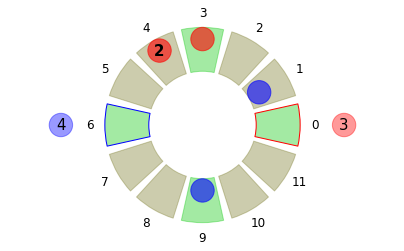

In [15]:
b = make_start_board(6, 12, safesquares=(3,9))
b.red = [0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0]
b.blue = [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
b.redpen,b.bluepen = 3,4
drawboard(b)

Blue to play, rolls **3**: counter at 1 can cut **both** counters at 4. 

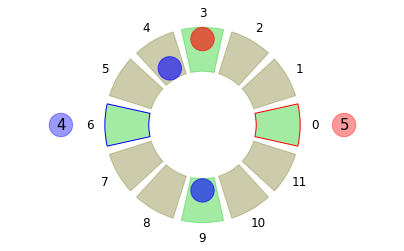

In [17]:
b2 = makemove(b, (1,1,3), copy=True)
drawboard(b2)

Red to play, rolls **6**: Counter at 8 cannot go to 2, skipping past home, but a counter can come in from the pen. 

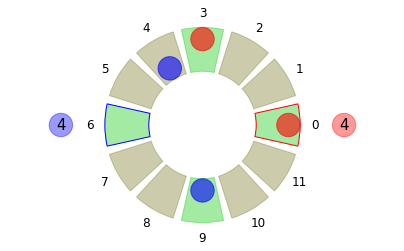

In [18]:
b3 = makemove(b2, (0,0,0), copy=True)
drawboard(b3)

Blue to play, rolls **2**: Either 9 can go to 11 or 4 can go home (better move!).

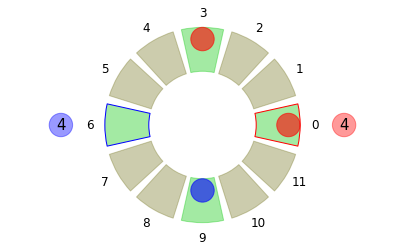

In [19]:
b4 = makemove(b3, (1,4,2), copy=True)
drawboard(b4)

In [23]:
bb = make_start_board(6,10)

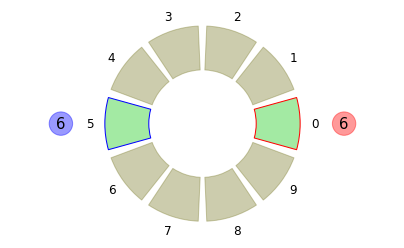

In [24]:
drawboard(bb)

In [25]:
getmoves(bb, 0, 3)

[(0, -1, -1)]

## Board and Move Formats

The last board above is represented so: 

In [10]:
b4

Board(counters=6, length=12, safe=[1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], red=[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], blue=[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], redpen=4, bluepen=4)

A regular move is a tuple *(turn, position, steps)*. Turn is 0 (red) and 1 (blue) and this move takes a counter at *position* forward by *steps*.

There are two special moves:

   A. *(turn,0,0)* moves a counter from the pen to home. Valid iff the roll is maximum.
   
   B. *(turn,-1,-1)* is a null move (do nothing/pass). Valid iff no other moves are possible.

## The Challenge

Write an engine that plays Robot Ludo. The inputs are the current board, the turn, and the roll of the die. The output is a move tuple.

For a single game the turn will be constant whenever your engine is called -- Red(0) or Blue(1) and the roll will chosen at random. The board will change in keeping with the moves made.   

```
def your_engine(board, turn, roll):
    # your code here...
    return move
```

### Example

The simplest possible engine would just play the first valid move that it finds. 

In [20]:
def simple_player(board,turn,roll):
    moves = getmoves(board,turn,roll)
    mymove = moves[0]
    return mymove

We can play a single match of this player against itself.

In [47]:
# First player is RED, second is BLUE
match(2,6,None,simple_player,simple_player,verbose=True)

0 5 (0, -1, -1)
1 2 (1, -1, -1)
0 6 (0, 0, 0)
1 6 (1, 0, 0)
0 2 (0, 0, 2)
1 2 (1, 3, 2)
0 3 (0, 2, 3)
1 5 (1, -1, -1)
0 2 (0, -1, -1)
1 5 (1, -1, -1)
0 4 (0, -1, -1)
1 1 (1, -1, -1)
0 2 (0, -1, -1)
1 1 (1, -1, -1)
0 5 (0, -1, -1)
1 6 (1, 0, 0)
0 2 (0, -1, -1)
1 1 (1, 3, 1)
0 4 (0, -1, -1)
1 1 (1, 4, 1)
0 6 (0, 0, 0)
1 4 (1, 5, 4)
0 6 (0, 0, 0)
1 6 (1, 0, 0)
0 5 (0, 0, 5)
1 3 (1, 3, 3)
0 4 (0, 0, 4)
1 1 (1, 0, 1)
0 1 (0, 4, 1)
1 3 (1, -1, -1)
0 3 (0, -1, -1)
1 3 (1, -1, -1)
0 4 (0, -1, -1)
1 3 (1, -1, -1)
0 2 (0, -1, -1)
1 5 (1, -1, -1)
0 4 (0, -1, -1)
1 2 (1, 1, 2)
Cuts 2 Moves 38


1

Or get the average winning fractions of a series of games

In [50]:
judge(10, 20, None, simple_player, simple_player, games=1000)

(0.06499999999999995, 0.935)

That is odd! The second player has a huge advantage. How could that possibly happen when we are using the exactly same strategy for each?

The answer is that our function for choosing the first valid move is *not symmetric* in the home positions for Red and Blue. We are taking the first moveable counter from 0 which would be the one closest to home for Red but further for Blue.

To symmetrise this strategy, we have to consider the cases turn=0 and turn=1 separately.

In [51]:
def halfshift(x, L):
    '''Count counter-clockwise from L/2-->0 to L/2-1-->L-1'''
    if x >= L//2:
        return x - L//2
    else:
        return x + L//2

def simple_player2(board,turn,roll):
    '''Symmetric strategy in Red and Blue'''
    
    moves = getmoves(board,turn,roll)
    if (turn,0,0) in moves:
        mymove = (turn,0,0) 
    elif turn == 0:
        mymove = moves[0]
    elif turn == 1:
        mymove = min(moves, key=lambda triple: halfshift(triple[1],board.length))
    return mymove

In [53]:
judge(10, 20, None, simple_player2, simple_player2, games=5000)

(0.5031055900621118, 0.4968944099378882)

Which is close to even, as expected.

Choosing a random move is also a symmetric strategy

In [54]:
import random

def simple_player3(board,turn,roll):
    moves = getmoves(board,turn,roll)
    mymove = random.choice(moves)
    return mymove

In [56]:
judge(10, 20, None, simple_player3, simple_player3, games=5000)

(0.5, 0.5)

In fact it is a much better strategy than choosing the first move.

In [57]:
judge(10, 20, None, simple_player3, simple_player2, games=5000)

(0.9194, 0.0806)

In [58]:
judge(10, 20, None, simple_player2, simple_player3, games=5000)

(0.08879999999999999, 0.9112)